In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('KAG_conversion_data.csv', index_col='ad_id')
df.head()

,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,,,,,,,,,,
708746,916,103916,30-34,M,15,7350,1,1.43,2,1
708749,916,103917,30-34,M,16,17861,2,1.82,2,0
708771,916,103920,30-34,M,20,693,0,0.00,1,0
708815,916,103928,30-34,M,28,4259,1,1.25,1,0
708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 708746 to 1314415
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   xyz_campaign_id      1143 non-null   int64  
 1   fb_campaign_id       1143 non-null   int64  
 2   age                  1143 non-null   object 
 3   gender               1143 non-null   object 
 4   interest             1143 non-null   int64  
 5   Impressions          1143 non-null   int64  
 6   Clicks               1143 non-null   int64  
 7   Spent                1143 non-null   float64
 8   Total_Conversion     1143 non-null   int64  
 9   Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 98.2+ KB


In [13]:
df.nunique()

xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [14]:
df.isnull().sum()

xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['age'] =LE.fit_transform(df['age'])
df['gender'] =LE.fit_transform(df['gender'])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 708746 to 1314415
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   xyz_campaign_id      1143 non-null   int64  
 1   fb_campaign_id       1143 non-null   int64  
 2   age                  1143 non-null   int32  
 3   gender               1143 non-null   int32  
 4   interest             1143 non-null   int64  
 5   Impressions          1143 non-null   int64  
 6   Clicks               1143 non-null   int64  
 7   Spent                1143 non-null   float64
 8   Total_Conversion     1143 non-null   int64  
 9   Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int32(2), int64(7)
memory usage: 89.3 KB


C:\Users\DELL INSPIRON 5625\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL INSPIRON 5625\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL INSPIRON 5625\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL INSPIRON 5625\AppData\Roaming\Python\Python311\site-packages\skle

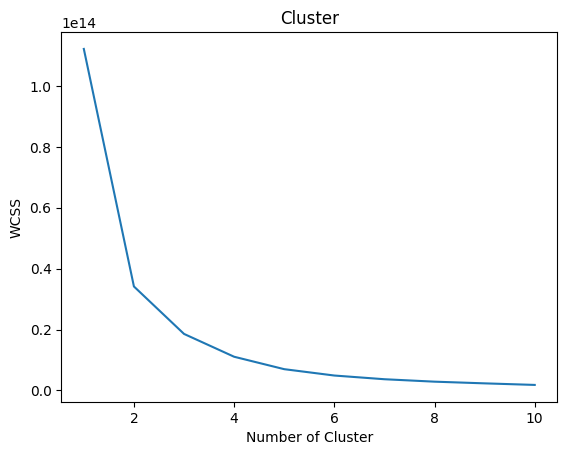

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Cluster')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(df)

C:\Users\DELL INSPIRON 5625\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


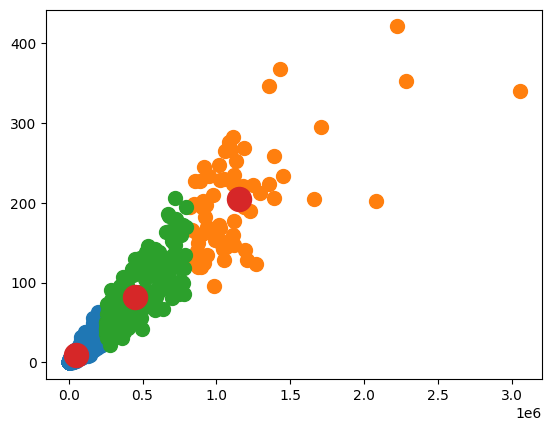

In [19]:
for i in range(3):
    plt.scatter(df.iloc[y_pred==i,5], df.iloc[y_pred==i, 6],s=100, label = f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:,5], kmeans.cluster_centers_[:,6],s=300, label = 'Centroids')
plt.show()

In [20]:
np.bincount(y_pred)

array([880,  69, 194], dtype=int64)